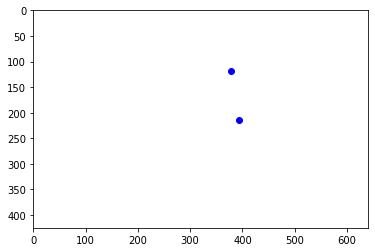

In [7]:
import numpy as np
import matplotlib.pyplot as plt

paf_sigma = 8         # 肢体宽度
shape = (425, 640, 3) # 图像大小
joint_from = np.array([378, 118]) # 肢体的两个点
joint_to = np.array([393,  214])

plt.xlim((0,shape[1]))
plt.ylim((0,shape[0]))
plt.scatter([joint_from[0], joint_to[0]], [joint_from[1], joint_to[1]], color='b')
plt.gca().invert_yaxis() # 将plt的原点由坐下设置为左上

vertical_unit_vector =  [ 0.98801203 -0.15437688]


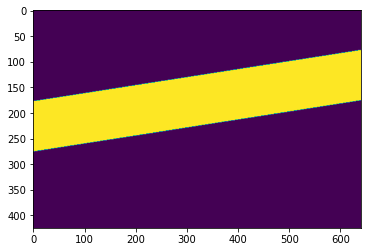

In [8]:
joint_distance = np.linalg.norm(joint_to - joint_from)
unit_vector = (joint_to - joint_from) / joint_distance
rad = np.pi / 2
rot_matrix = np.array([[np.cos(rad), np.sin(rad)], [-np.sin(rad), np.cos(rad)]])
# print("垂直分量 = ", np.dot(rot_matrix,(joint_to - joint_from) ))
vertical_unit_vector = np.dot(rot_matrix, unit_vector)  # 垂直分量
print("vertical_unit_vector = ", vertical_unit_vector)
grid_x = np.tile(np.arange(shape[1]), (shape[0], 1))
grid_y = np.tile(np.arange(shape[0]), (shape[1], 1)).transpose()  # grid_x, grid_y用来遍历图上的每一个点

horizontal_inner_product = unit_vector[0] * (grid_x - joint_from[0]) + unit_vector[1] * (grid_y - joint_from[1])
horizontal_paf_flag = (0 <= horizontal_inner_product) & (horizontal_inner_product <= joint_distance)
plt.imshow(horizontal_paf_flag)

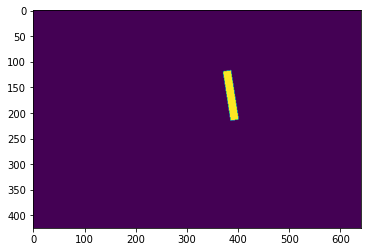

In [9]:
vectemp = vertical_unit_vector # 垂直分量
# 求图像上点到线之间的距离 = 图像上的向量与垂直向量的点乘

vertical_inner_product = vectemp[0] * (grid_x - joint_from[0]) + vectemp[1] * (grid_y - joint_from[1])
vertical_paf_flag = np.abs(vertical_inner_product) <= paf_sigma  # paf_width : 8
paf_flag = horizontal_paf_flag & vertical_paf_flag  # 合并两个限制条件
plt.imshow(paf_flag)

In [10]:
# constant_paf.shape : (2, 368, 368), 上面这一步就是把2维的unit_vector broadcast到所有paf_flag为true的点上去
# constant_paf里面有368*368个点，每个点上有两个值，代表一个矢量
# constant_paf里的这些矢量只会取两种值，要么是(0,0),要么是unit_vector的值
print(unit_vector)
np.broadcast_to(unit_vector , shape[:-1] + (2,))
print(np.broadcast_to(unit_vector , shape[:-1] + (2,)).shape)
paf_flag = paf_flag + 0
constant_paf = np.stack((paf_flag, paf_flag)) * np.broadcast_to(unit_vector, shape[:-1] + (2,)).transpose(2, 0, 1)
# plt.show(constant_paf[0])
print(constant_paf.shape)
print(constant_paf[0].shape)
print(constant_paf[0][119, 379]) # 得到单位向量X=0.1543768802736096
print(constant_paf[1][119, 379]) # 得到单位向量y=0.9880120337511015

[0.15437688 0.98801203]
(425, 640, 2)
(2, 425, 640)
(425, 640)
0.1543768802736096
0.9880120337511015


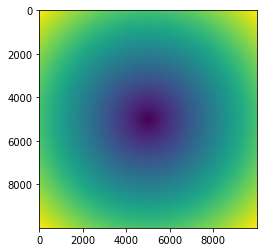

In [48]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

points = np.arange(-5, 5, 0.001) #1000个间隔相等的点
xs, ys = np.meshgrid(points, points) #生成网格点坐标矩阵
z = np.sqrt(xs**2 + ys**2) #xs*xs + ys*ys = z*z

fig = plt.figure() #创建一个新Figure
ax1 = fig.add_subplot(111) 
plt.imshow(z)
plt.show()

True

In [25]:
import numpy as np
import cv2
sigma = 2
input_size=(96,96)
center=(10,10)
stride=1
start=stride/2-0.5#用来控制center的位置，默认stride为1
xx=np.arange(1,input_size[0])
yy=np.arange(1,input_size[1])
xx,yy=np.meshgrid(xx,yy)
xx=xx*stride+start
yy = yy * stride + start
D=(xx-center[0])**2+(yy-center[1])**2
exponent=D/2/sigma/sigma
heatmap=np.exp(-exponent)
heatmap*=255
type(heatmap)
heatmap=heatmap.astype(np.uint8)
heatmap=cv2.applyColorMap(heatmap, cv2.COLORMAP_HOT)
cv2.imwrite('./4.jpg',heatmap)

True

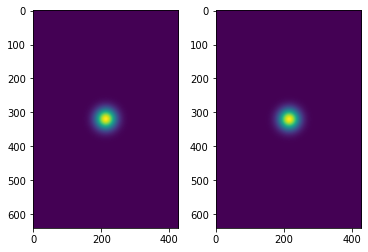

End.


In [28]:
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt


def CenterLabelHeatMap(img_width, img_height, c_x, c_y, sigma):
    X1 = np.linspace(1, img_width, img_width)
    Y1 = np.linspace(1, img_height, img_height)
    [X, Y] = np.meshgrid(X1, Y1)
    X = X - c_x
    Y = Y - c_y
    D2 = X * X + Y * Y
    E2 = 2.0 * sigma * sigma
    Exponent = D2 / E2
    heatmap = np.exp(-Exponent)
    return heatmap


# Compute gaussian kernel
def CenterGaussianHeatMap(img_height, img_width, c_x, c_y, variance):
    gaussian_map = np.zeros((img_height, img_width))
    for x_p in range(img_width):
        for y_p in range(img_height):
            dist_sq = (x_p - c_x) * (x_p - c_x) + \
                      (y_p - c_y) * (y_p - c_y)
            exponent = dist_sq / 2.0 / variance / variance
            gaussian_map[y_p, x_p] = np.exp(-exponent)
    return gaussian_map


image_file = './000000005134.jpg'
img = cv2.imread(image_file)
img = img[:,:,::-1]

height, width,_ = np.shape(img)
cy, cx = height/2.0, width/2.0
heatmap1 = CenterLabelHeatMap(width, height, cx, cy, 21)
heatmap2 = CenterGaussianHeatMap(height, width, cx, cy, 21)
plt.subplot(1,2,1)
plt.imshow(heatmap1)
plt.subplot(1,2,2)
plt.imshow(heatmap2)
plt.show()

print('End.')

In [36]:
import cv2
import numpy as np

img1 = cv2.imread('./heatmappoint.jpg')
img2 = cv2.imread('./000000005134.jpg')

img_mix = cv2.addWeighted(img1, 0.6, img2, 0.4, 0)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img_mix', img_mix)

cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.5) /io/opencv/modules/core/src/arithm.cpp:647: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


In [3]:
##生成heatmap
import os
import numpy as np
import json
import cv2
from itertools import groupby
import random
from matplotlib import pyplot as plt
dataset_dir = "coco/val2017/"
dataset_save = "coco/mediaed/"

def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data-np.min(data))/_range*255

def CenterLabelHeatMap(img,kpts,sigma):
    img_height,img_width ,_ = img.shape
    # img = cv2.applyColorMap(img,3)
    X1 = np.linspace(1,img_width,img_width)
    Y1 = np.linspace(1,img_height,img_height)
    heatmap=list()
    result = 0
    for num in range(len(kpts)):
        [X,Y]=np.meshgrid(X1,Y1)
        X = X-kpts[num][0]
        Y = Y-kpts[num][1]
        D2 = X*X+Y*Y
        E2 = 2.0*sigma*sigma
        Exponent = D2/E2
        heatmap_1  =np.exp(-Exponent)
        heatmap_1 = normalization(heatmap_1)
        heatmap_1 = np.array(heatmap_1,np.uint8)
        heatmap.append(heatmap_1)
    for hm in heatmap:
        result+=hm
    heatmap = cv2.applyColorMap(result,cv2.COLORMAP_JET)
    img = img*0.3+heatmap*0.7
    return img,heatmap

def CenterGaussianHeatMap(img,c_x,c_y,variance):
    img_height, img_width, _ = img.shape
    img = cv2.applyColorMap(img, 2)
    gaussian_map = np.zeros((img_height,img_width,3))
    for x_p in range(img_width):
        for y_p in range(img_height):
            dist_sq = (x_p-c_x)*(x_p-c_x)+(y_p-c_y)*(y_p-c_y)
            exponent = dist_sq/2.0/variance/variance
            gaussian_map[y_p,x_p,0] = np.exp(-exponent)
    gaussian_map = normalization(gaussian_map)
    # img[:,:,0]=img[:,:,0]*0.1+gaussian_map[:,:,0]*0.9
    return img
"""
先用groupby将同一个key下的不同人体相同关节点位置取出来
"""
with open("coco/annotations/person_keypoints_val2017.json","r") as load_f:
    load_dict = json.load(load_f)
ret = list()
ret_num = list()
for group_num,group in groupby(load_dict,lambda x: x.get("image_id")):
    ret.append(list(group))
    ret_num.append(group_num)
ret_result = zip(ret_num,ret)

imgIds_old = 0
image = cv2.imread(os.path.join(dataset_dir, str(397133).zfill(12) + '.jpg'))

for dict_num in ret_result:
    imgIds = dict_num[0]
    if imgIds==127263 :
        image_path = os.path.join(dataset_dir, str(imgIds).zfill(12) + '.jpg')
        image = cv2.imread(image_path)
        for kpts_num in range(17):
            joints = list()
            for person_num in range(len(dict_num[1])):
                person_mess = np.array(dict_num[1][person_num]['keypoints']).reshape(-1,3)
                joints.append(person_mess[kpts_num])

            img,heatmap=CenterLabelHeatMap(image,joints,4)
            cv2.imwrite("./{}.jpg".format(kpts_num),img)



AttributeError: 'str' object has no attribute 'get'

In [15]:
img =cv2.imread("./000000005134.jpg")
img = cv2.resize(img,(800,800),interpolation=cv2.INTER_CUBIC)
cv2.imwrite("./resize.jpg",img)

True

In [20]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
def heat_map(data, map_size=800):
    """
    绘制散点热图
    Args:
        data: 数据结构为list[(int，int，value)]
        map_size: 画布大小
    Returns:热力图
    """
    #map = np.array([0] * pow(map_size, 2), dtype=np.uint8).reshape((map_size, map_size))
    map = cv2.imread("./resize.jpg")
    map =np.asarray(map,dtype=np.uint8).reshape((map_size,map_size,3))
 
    for d in data:
        u = d[0]
        v = d[1]
        val = min(255, int(d[2] * 200))
        attention(u, v, val, map)
 
    heat_img = cv2.applyColorMap(map, cv2.COLORMAP_JET)  # 注意此处的三通道热力图是cv2专有的GBR排列
    heat_img[(heat_img[:, :, 0] == 128) & (heat_img[:, :, 1] == 0) & (heat_img[:, :, 2] == 0)] = [0, 0, 0]
    heat_img = cv2.transpose(heat_img)
    cv2.imwrite("./2.jpg", heat_img, [cv2.IMWRITE_PNG_COMPRESSION, 0])
 
 
def attention(u, v, val, map, r=20):
    shape = map.shape
    w, h = shape[0], shape[1]
 
    intensity = np.linspace(val, 0, r, dtype=np.uint8)
 
    for x in range(max(0, u-r), min(w, u+r)):
        for y in range(max(0, v-r), min(h, v+r)):
            distance = math.ceil(math.sqrt(pow(x-u, 2) + pow(y-v, 2)))
 
            if distance < r:
                if map[x][y] == 0:
                    map[x][y] = intensity[distance]
                else:
                    map[x][y] = max(map[x][y], intensity[distance])
heat_map([(100,100,2)])